# Exercises 01

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.stats import chi2

## 01.1 - Testing the Pseudo-Random Generator contained in ../Random

This first exercise has the aim of checking if the pseudo-random generator is random enough for a uniform distribution in [0,1).

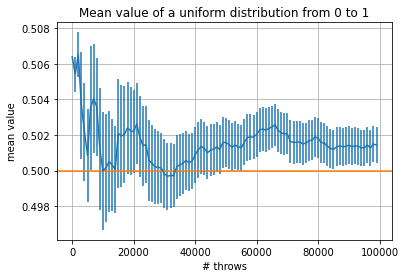

In [2]:
path = "Es1/mean.out"

M, N = np.loadtxt(path, usecols=(0,1), delimiter=' ', unpack='true', max_rows=1)

mean, error = np.loadtxt(path, usecols=(0,1), delimiter=' ', unpack='true', skiprows=1)


x = np.arange(N)
L=int(M/N)
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,mean,yerr=error)
plt.axhline(y=0.5, color = 'tab:orange')
plt.xlabel('# throws')
plt.ylabel('mean value')
plt.title("Mean value of a uniform distribution from 0 to 1")
plt.grid(True)
plt.show()

The simulated mean value is consistent (within 2 $\sigma$) with the expected value of a uniform distribution between 0 and 1, which is 0.5.

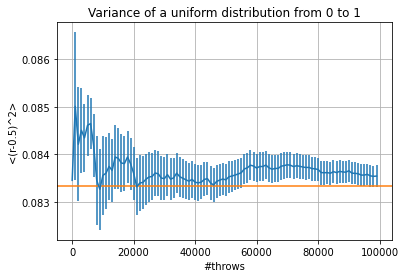

In [3]:
path = "Es1/var.out"

var, error = np.loadtxt(path, usecols=(0,1), delimiter=' ', unpack='true', skiprows=1)


x = np.arange(N)
L=int(M/N)
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,var,yerr=error)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>')
plt.axhline(y=1/12, color= 'tab:orange')
plt.title("Variance of a uniform distribution from 0 to 1")
plt.grid(True)
plt.show()

The expected variance is 1/12, because $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. In this case the simulated value is consisted within 1$\sigma$ with the expected value


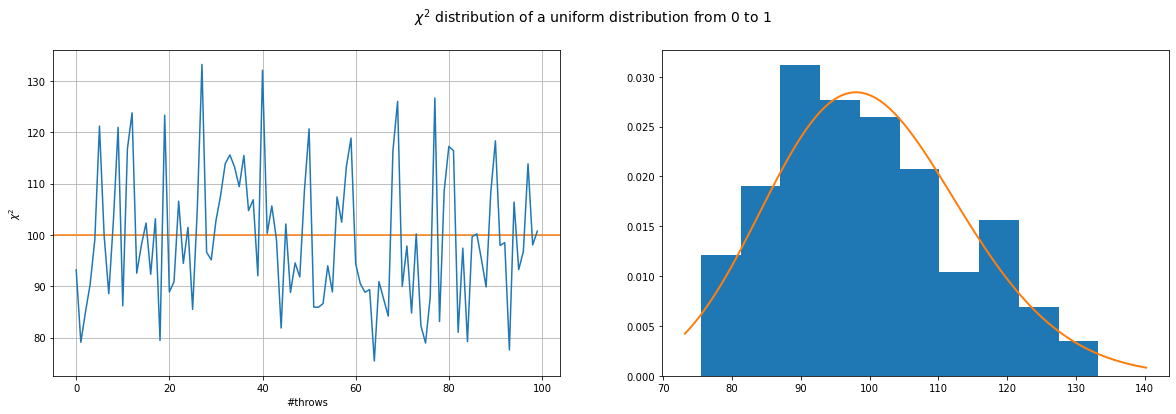

In [4]:
path = "Es1/chi.out"

N = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', max_rows=1)
chi = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', skiprows=1)


x = np.arange(N)

fig, ((ax1,ax2))=plt.subplots(1, 2, figsize = (20,6))
fig.suptitle("$\chi^2$ distribution of a uniform distribution from 0 to 1", size = 14)

ax1.errorbar(x,chi)
ax1.set_xlabel('#throws')
ax1.set_ylabel('$\chi^2$')

k=100
x_chi=np.linspace(chi2.ppf(0.02,k), chi2.ppf(0.995,k), 100)

ax2.hist(chi, color='tab:blue', density=True)
ax2.plot(x_chi, chi2.pdf(x_chi, k), lw=2, color = 'tab:orange')

ax1.axhline(y=100, color='tab:orange')
ax1.grid(True)
plt.show()

The expected value of the $\chi^2$ distribution is the number of degrees of freedom (i.e. the number of throws).

## 01.2 - Checking the central limit theorem

In [5]:
def gaussian (x, mean, width, std_dev):
    return width * np.exp( - (x-mean)**2 / (2*std_dev)**2)

In [6]:
def lorentzian (x, mean, gamma):
    return gamma/(math.pi) * (1/((x-mean)**2+gamma**2))

In this exercise we tried to implement three different probability distribution, checking if the central limit theorem applies to them.

N indicates the number of throws in each block, while the total number of throws is fixed at $10^4$.

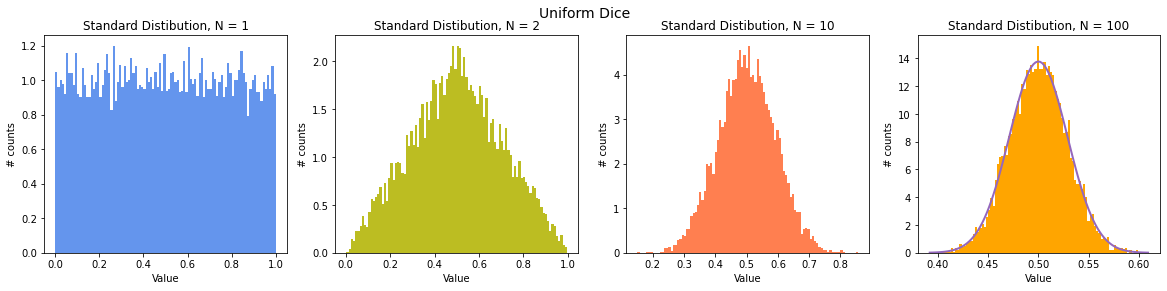

In [7]:
path = "Es2/Std.out"

n_bins = 100

N = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', max_rows=1)
M = np.loadtxt(path, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true', skiprows=1, max_rows=1)

v1, v2, v3, v4 = np.loadtxt(path, usecols=(0, 1, 2 ,3), delimiter=' ', unpack='true', skiprows=2)

fig, ((ax1,ax2,ax3,ax4))=plt.subplots(1, 4, figsize = (20,4))

fig.suptitle("Uniform Dice", size = 14)

data_entries, bins=np.histogram(v4, bins=n_bins, density = True)
bincenter=np.array([(bins[i]+bins[i+1])/2 for i in np.arange (n_bins)])

popt, pcov = curve_fit(gaussian, xdata = bincenter, ydata=data_entries)

ax4.plot(bincenter, gaussian(bincenter, *popt), color = 'tab:purple', linewidth = 2)

ax1.hist(v1, bins=n_bins, color='cornflowerblue', density=True)
ax1.set_xlabel("Value")
ax1.set_ylabel("# counts")
ax1.set_title("Standard Distibution, N = " +str(int(M[0])))

ax2.hist(v2, bins=n_bins, color='tab:olive', density=True)
ax2.set_xlabel("Value")
ax2.set_ylabel("# counts")
ax2.set_title("Standard Distibution, N = " +str(int(M[1])))

ax3.hist(v3, bins=n_bins, color='coral', density=True)
ax3.set_xlabel("Value")
ax3.set_ylabel("# counts")
ax3.set_title("Standard Distibution, N = " +str(int(M[2])))

ax4.hist(v4, bins=n_bins, color='orange', density=True)
ax4.set_xlabel("Value")
ax4.set_ylabel("# counts")
ax4.set_title("Standard Distibution, N = " +str(int(M[3])))

plt.show()

As expected, by adding more throws in each block the graphs tend to a gaussian distribution. In the last picture the fit with the gaussian is shown.

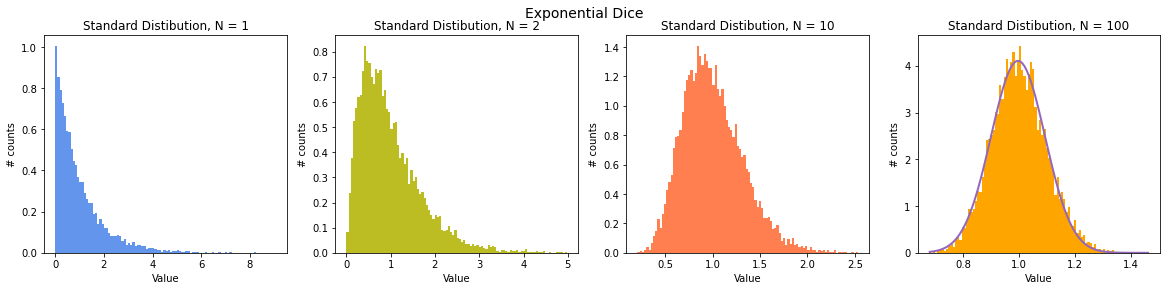

In [8]:
path = "Es2/Exp.out"

n_bins = 100

N = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', max_rows=1)
M = np.loadtxt(path, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true', skiprows=1, max_rows=1)

v1, v2, v3, v4 = np.loadtxt(path, usecols=(0, 1, 2 ,3), delimiter=' ', unpack='true', skiprows=2)

fig, ((ax1,ax2,ax3,ax4))=plt.subplots(1, 4, figsize = (20,4))

fig.suptitle("Exponential Dice", size = 14)
      
data_entries, bins=np.histogram(v4, bins=n_bins, density = True)
bincenter=np.array([(bins[i]+bins[i+1])/2 for i in np.arange (n_bins)])

popt, pcov = curve_fit(gaussian, xdata = bincenter, ydata=data_entries)

ax4.plot(bincenter, gaussian(bincenter, *popt), color = 'tab:purple', linewidth = 2)

ax1.hist(v1, bins=n_bins, color='cornflowerblue', density=True)
ax1.set_xlabel("Value")
ax1.set_ylabel("# counts")
ax1.set_title("Standard Distibution, N = " +str(int(M[0])))

ax2.hist(v2, bins=n_bins, color='tab:olive', density=True)
ax2.set_xlabel("Value")
ax2.set_ylabel("# counts")
ax2.set_title("Standard Distibution, N = " +str(int(M[1])))

ax3.hist(v3, bins=n_bins, color='coral', density=True)
ax3.set_xlabel("Value")
ax3.set_ylabel("# counts")
ax3.set_title("Standard Distibution, N = " +str(int(M[2])))

ax4.hist(v4, bins=n_bins, color='orange', density=True)
ax4.set_xlabel("Value")
ax4.set_ylabel("# counts")
ax4.set_title("Standard Distibution, N = " +str(int(M[3])))

plt.show()

And the same goes for the exponential dice.

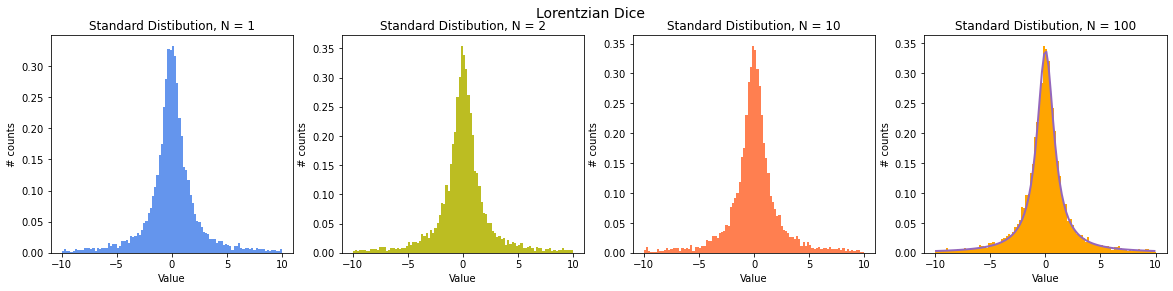

In [9]:
path = "Es2/Lor.out"

n_bins = 100

N = np.loadtxt(path, usecols=(0), delimiter=' ', unpack='true', max_rows=1)
M = np.loadtxt(path, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true', skiprows=1, max_rows=1)

v1, v2, v3, v4 = np.loadtxt(path, usecols=(0, 1, 2 ,3), delimiter=' ', unpack='true', skiprows=2)

fig, ((ax1,ax2,ax3,ax4))=plt.subplots(1, 4, figsize = (20,4))

fig.suptitle("Lorentzian Dice", size = 14)
      
data_entries, bins=np.histogram(v4, bins=n_bins, density = True, range=(-10,10))
bincenter=np.array([(bins[i]+bins[i+1])/2 for i in np.arange (n_bins)])

popt, pcov = curve_fit(lorentzian, xdata = bincenter, ydata=data_entries)

ax4.plot(bincenter, lorentzian(bincenter, *popt), color = 'tab:purple', linewidth = 2)

ax1.hist(v1, bins=n_bins, color='cornflowerblue',density=True, range=(-10,10))
ax1.set_xlabel("Value")
ax1.set_ylabel("# counts")
ax1.set_title("Standard Distibution, N = " +str(int(M[0])))

ax2.hist(v2, bins=n_bins, color='tab:olive', density=True, range=(-10,10))
ax2.set_xlabel("Value")
ax2.set_ylabel("# counts")
ax2.set_title("Standard Distibution, N = " +str(int(M[1])))

ax3.hist(v3, bins=n_bins, color='coral', density=True, range=(-10,10))
ax3.set_xlabel("Value")
ax3.set_ylabel("# counts")
ax3.set_title("Standard Distibution, N = " +str(int(M[2])))

ax4.hist(v4, bins=n_bins, color='orange', density=True, range=(-10,10))
ax4.set_xlabel("Value")
ax4.set_ylabel("# counts")
ax4.set_title("Standard Distibution, N = " +str(int(M[3])))

plt.show()

In this case it does not tend to a gaussian distribution, because the variance is not finite and therefore not all the hpothesis of the main central limit ar met.

## 01.1 - Extimating $\pi$ through the Buffon's Experiment

The  Buffon experiment consists of throwing a needle, of lenght L, at a lattice made of straight parallel lines each distant d from the next one.

It allows us to get an estimation of $\pi$ through the following relation: 

$$ \pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

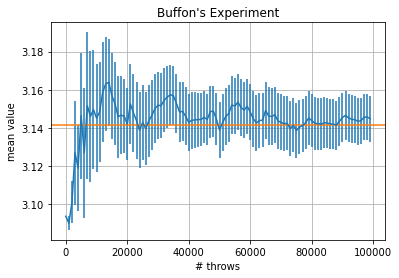

In [10]:
path = "Es3/Pi.out"

M, N, L, d = np.loadtxt(path, usecols=(0,1,2,3), delimiter=' ', unpack='true', max_rows=1)

mean, error = np.loadtxt(path, usecols=(0,1), delimiter=' ', unpack='true', skiprows=1)


x = np.arange(N)
L=int(M/N)
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,mean,yerr=error)
plt.axhline(y=math.pi, color='tab:orange')
plt.xlabel('# throws')
plt.ylabel('mean value')
plt.title("Buffon's Experiment")
plt.grid(True)
plt.show()

The simulation was done using  $10^5$ total thows over a total of 100 blocks. The simulated value is consistent (i.e. is within $1\sigma$) from the real value of $\pi$. 

The simulation is done without using the value of $\pi$ within the code. This is accomplished by simulating a random point within a square with the size of the side the lenght of the needle and keeping only the points with a smaller distance from the origin than the lenght of the needle. In this way, we get a uniformly distributed angle from [0,$2\pi$] without using the true value of $\pi$. After that we check if the thrown needle hits the line (i.e. by checking if the projection falls farther away that the line of the lattice).